# Plot Stations on Map

In [1]:
import numpy as np
import pandas as pd
from obspy.core import UTCDateTime
import pygmt

In [2]:
stats = pd.read_csv('sta_log_long.txt', sep='|', header=0)
# stats = stats.groupby('Station').agg({'StartTime': 'min', 'EndTime': 'max','Latitude': 'first', 'Longitude': 'first', 'Elevation': 'first'}).reset_index()
stats['color'] = np.zeros(len(stats))
stats.loc[stats['Network'] == 'UW', 'color'] = '#d62728'
stats.loc[stats['Network'] == 'CC', 'color'] = '#ff7f0e'
stats.loc[stats['Network'] == 'USGS', 'color'] = '#17becf'
stats.loc[stats['Network'] == 'SNOFLO', 'color'] = 'black'

stats['transparency'] = np.full(len(stats),0)
stats.loc[stats['Network'] == 'CC', 'transparency'] = 50

stats = stats.loc[stats['Network'] != 'PB']

for i,row in stats.iterrows():
    dt = UTCDateTime(row.EndTime)-UTCDateTime(row.StartTime) # in sec
    if dt < (60*60*24*30): # 30d in sec
        stats.drop(i, inplace=True)
    elif UTCDateTime(row.EndTime)<UTCDateTime('2004-01-01'):
        stats.drop(i, inplace=True)

print(stats.shape)
stats

(40, 10)


,Network,Station,Latitude,Longitude,Elevation,Sitename,StartTime,EndTime,color,transparency
1,CC,BLIS,46.197472,-122.186569,2116.00,"Blister, Mt. St. Helens (Dome sta)",2004-10-12T00:00:00,2005-02-17T00:00:00,#ff7f0e,50
2,CC,GUAC,46.219200,-122.192330,1618.30,"Guacamole, crater of Mount St. Helens",2018-11-19T00:00:00,2599-12-31T23:59:59,#ff7f0e,50
3,CC,HOA,46.241780,-122.191830,1151.00,Hoala,2021-06-08T00:00:00,2599-12-31T23:59:59,#ff7f0e,50
4,CC,JRO,46.275270,-122.218260,1219.00,Johnston Ridge Observatory,2004-10-02T00:00:00,2599-12-31T23:59:59,#ff7f0e,50
5,CC,LOO,46.223750,-122.184390,1521.35,Loowit,2021-06-08T00:00:00,2599-12-31T23:59:59,#ff7f0e,50
6,CC,MAR,46.285320,-122.296670,679.27,Maratta,2021-06-17T00:00:00,2599-12-31T23:59:59,#ff7f0e,50
7,CC,MIBL,46.197319,-122.186913,2132.00,St Helens between BLIS and MIDE,2005-11-18T00:00:00,2007-12-31T00:00:00,#ff7f0e,50
8,CC,MIDE,46.197750,-122.187439,2132.00,Near old BLIS MSH,2005-02-16T00:00:00,2005-07-26T00:00:00,#ff7f0e,50
9,CC,NED,46.200249,-122.185493,2060.00,"NE part of old Dome, Mt. St. Helens (Dome sta)",2004-11-20T00:00:00,2013-05-01T00:00:00,#ff7f0e,50
10,CC,NFT,46.270000,-122.256110,818.16,North Fork Toutle,2021-06-08T00:00:00,2599-12-31T23:59:59,#ff7f0e,50


grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -122.401486 to -122.401666667
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -121.99625 to -121.995833333
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from 46.06712 to 46.0666666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 46.40067 to 46.4008333333


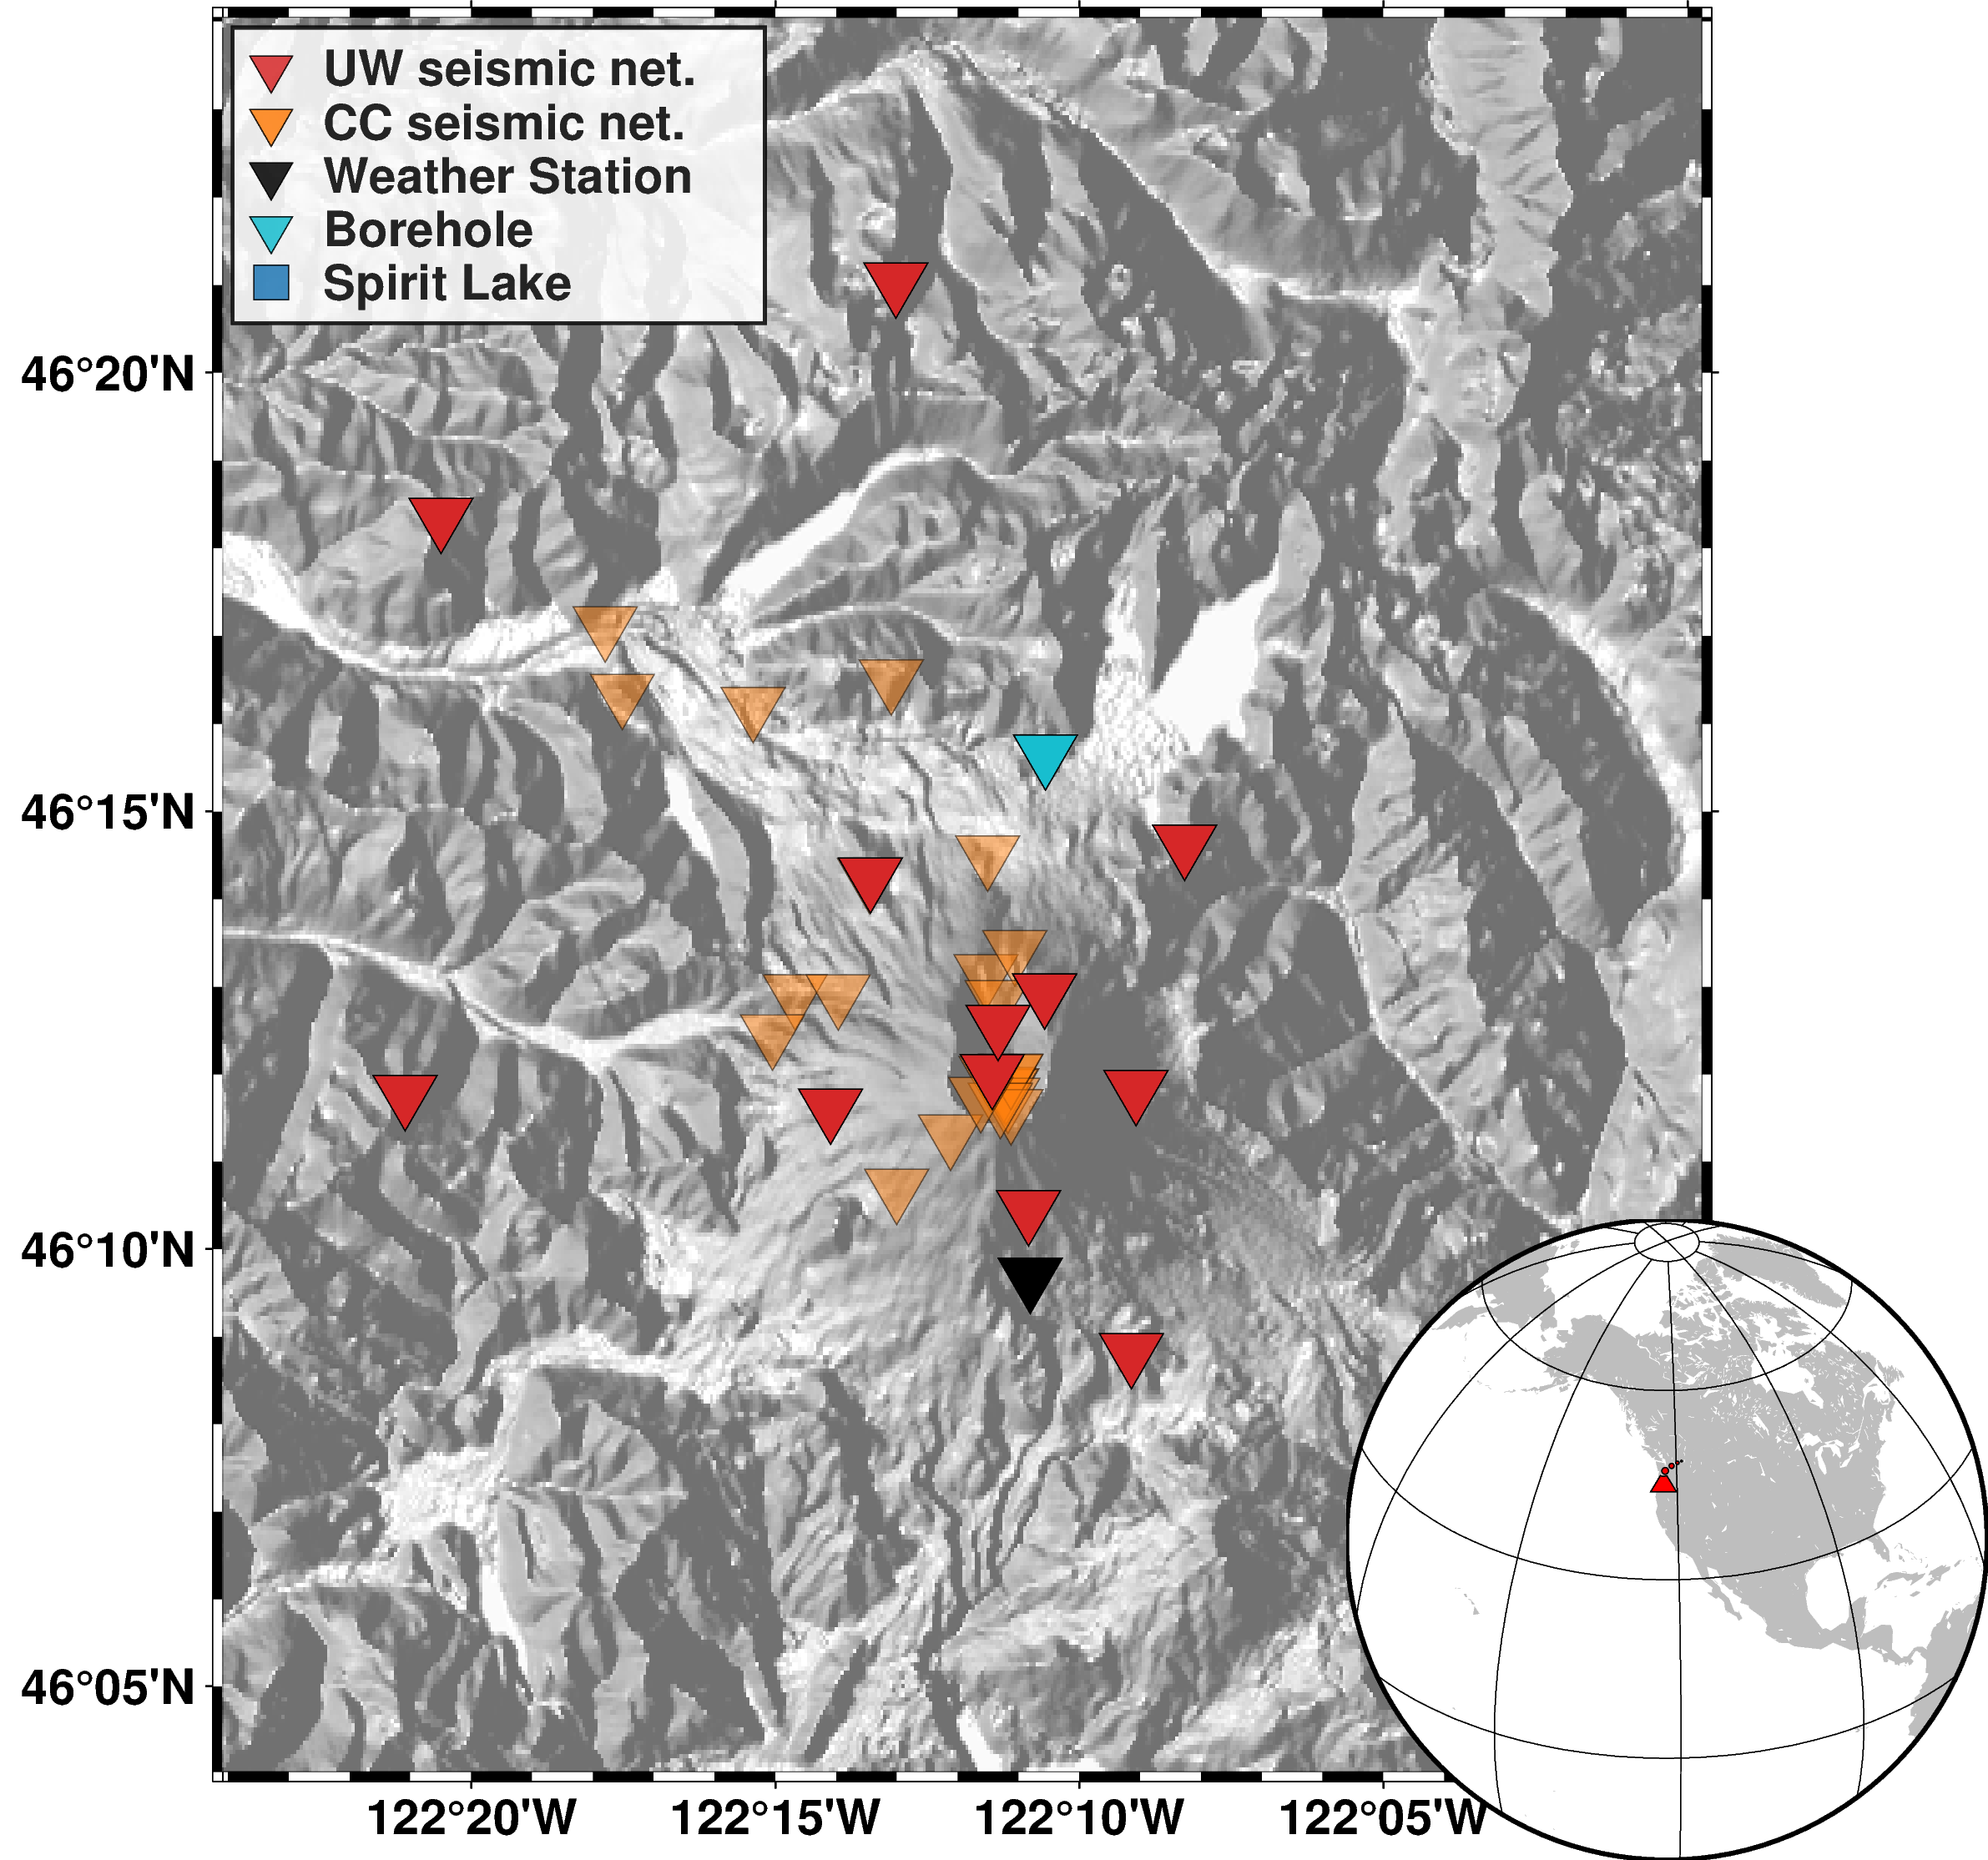

In [3]:
region = [
    stats.Longitude.min() - .05,
    stats.Longitude.max() + .05,
    stats.Latitude.min() - .05,
    stats.Latitude.max() + .05,
]

helen = (46.191, -122.196)



pygmt.config(FONT='14p,Helvetica-Bold')
pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig = pygmt.Figure()
# Load sample grid (3 arc-seconds global relief) in target area
grid = pygmt.datasets.load_earth_relief(resolution='03s', region=region)
# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])

fig.basemap(region=region, projection="M15c", frame=True)
fig.grdimage(transparency='20', grid=dgrid, projection="M15c", cmap=True) #cmap="geo")

for i in stats.index:
    fig.plot(
        x=stats.Longitude[i], y=stats.Latitude[i], style="i0.75c",
        fill=stats.color[i],pen="black", transparency=stats.transparency[i])
    
# legende
fig.plot(
    x=np.nan, y=np.nan, style="i0.5c", pen="black",
    fill='#d62728', transparency=25,
    label='UW seismic net.')
fig.plot(
    x=np.nan, y=np.nan, style="i0.5c", pen="black",
    fill='#ff7f0e', transparency=25,
    label='CC seismic net.')
fig.plot(
    x=np.nan, y=np.nan, style="i0.5c", pen="black",
    fill='black', transparency=25,
    label='Weather Station')
fig.plot(
    x=np.nan, y=np.nan, style="i0.5c", pen="black",
    fill='#17becf', transparency=25,
    label='Borehole')
fig.plot(
    x=np.nan, y=np.nan, style="s0.5c", pen="black",
    fill='#1f77b4', transparency=25,
    label='Spirit Lake')

fig.legend(transparency=15, box="+gwhite+p1p", position="jTL+jTL+w5.4c/3.c+o0.1c")

lonmid = (region[0] + region[1])/2
latmid = (region[2] + region[3])/2 - 10
with fig.inset(position="jBR+w6.5c/6.5c+o-2.9c/-.9c"):
    fig.coast(
        projection=f"G{lonmid}/{latmid}/60/6.5c", region="g", frame="g",
        land="gray", water='white')
    fig.plot(
        x=helen[1], y=helen[0], style="kvolcano/0.33c", fill="red",
        pen="black", projection=f"G{lonmid}/{latmid}/60/6.5c")

# fig.savefig('station_map_water_2004_hillshade222.png', dpi=300)
fig.show()
